In [1]:
#### --- Libraries --- ####
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
m = np.arange(12).reshape((3,4))
# Compute total mean using numpy mean function
mean = np.mean(m)
# Compute mean along columns
mean_col = m.mean(axis = 0)
# Compute mean along rows
mean_rows = m.mean(axis = 1)

print("Matrix:\n",m)
print("\nTotal mean is ",mean)
print("Mean along the rows is ",mean_rows)
print("Mean along the columns is ",mean_col)

Matrix:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Total mean is  5.5
Mean along the rows is  [1.5 5.5 9.5]
Mean along the columns is  [4. 5. 6. 7.]


2\. Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

# using built-in function np.outer 
o1 = np.outer(u,v)
print('First method:\n',o1)

# using list comprehension
a = [i * j for i in u for j in v]
o2_1 = np.array(a).reshape(4,4)
print('Second method:\n',o2_1)

# using for loop
o2 = np.zeros((4,4))
for i in np.arange(0,4):
    for j in np.arange(0,4):
        o2[i,j] = u[i]*v[j]
print('Third method:\n',o2)

# using broadcasting operation

o3 = np.tile(u,(4,1)).T * np.tile(v,(4,1))
print('Fourth method:\n',o3)

First method:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Second method:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Third method:
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
Fourth method:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of increasing float numbers, starting from zero and increasing in each step by 0.1, so the output matrix looks like the following:

```python
m = [[0. 0.1, 0.2 0.3 ... 0.9]
     [1.0 1.1 1.2 1.3 ... 1.9]
     ...
     [5.0 5.1 5.2 5.3 ... 5.9]]
```
After creating the matrix, set all entries with a decimal part $< 0.4$ to zero.

In [4]:
# create all zeros matrix
m = np.zeros((6,10))
# fill the matrix
for i in np.arange(0,6):
    for j in np.arange(0,10):
        m[i,j] = i + 0.1*j
        
print("The matrix is:\n",m)
# modify the matrix
for i in np.arange(0,6):
    for j in np.arange(0,10):
        if (m[i,j] - i) < 0.39:
            m[i,j] = 0 
        
print("Modified matrix is:\n",m)



The matrix is:
 [[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
 [2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
 [3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9]
 [4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]]
Modified matrix is:
 [[0.  0.  0.  0.  0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.  0.  0.  1.4 1.5 1.6 1.7 1.8 1.9]
 [0.  0.  0.  0.  2.4 2.5 2.6 2.7 2.8 2.9]
 [0.  0.  0.  0.  3.4 3.5 3.6 3.7 3.8 3.9]
 [0.  0.  0.  0.  4.4 4.5 4.6 4.7 4.8 4.9]
 [0.  0.  0.  0.  5.4 5.5 5.6 5.7 5.8 5.9]]


4\. Use `np.linspace` to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the sin and cos functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

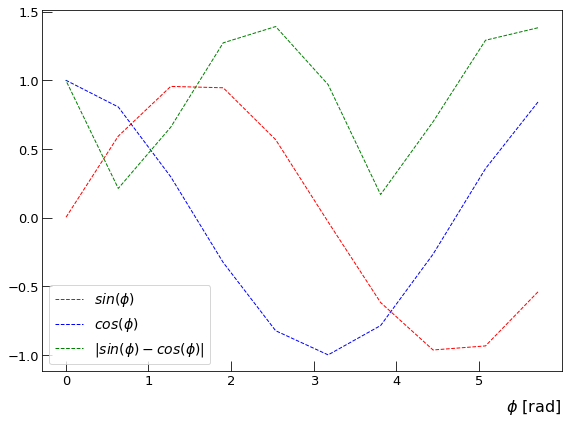

In [5]:
a = np.linspace(0,2*np.pi,100)
# Extract every 10 th element
a = a[::10]
# Reverse array
a = a[::-1]
# Create a mask to evaluate the wanted value
mask = ( np.abs(np.sin(a)-np.cos(a)) < 0.1 )
filtered_a = a[mask]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

# evaluate sin and cos @ the points of interest
y = np.sin(filtered_a)
y2 = np.cos(filtered_a)
# evaluate |sin(a) - cos(a)|
abs_val = np.abs(np.sin(a)-np.cos(a))


ax.plot(a[mask],y, marker = 'o',markersize=5,markerfacecolor = 'red',markeredgecolor = 'red',lw = 0)
ax.plot(a,np.sin(a),ls = 'dashed',lw =1, color = 'red', label = '$sin(\phi)$')

ax.plot(a[mask],y2, marker = 'o',markersize=5,markerfacecolor = 'blue',markeredgecolor = 'blue',lw = 0)
ax.plot(a,np.cos(a), ls= 'dashed',lw =1, color = 'blue',label = '$cos(\phi)$')

ax.plot(a,abs_val, ls= 'dashed',lw =1, color = 'green',label = '$|sin(\phi)-cos(\phi)|$')

ax.set_xlabel('$\phi$ [rad]', fontsize = 16, loc = 'right', labelpad = 10)
ax.legend(loc = 'best', prop = {'size': 14}, ncol = 1)
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10,labelsize = 13)

fig.tight_layout()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
# set the 10x10 matrix
matrix = np.zeros((10,10))

for i in np.arange(1,11):
    for j in np.arange(1,11):
        matrix[i-1,j-1] = i*j

# compute trace
trace = sum(np.diag(matrix))

# extract anti-diagonal entries
antidiag = np.fliplr(matrix).diagonal()

# extract diagonal offset by 1 upwards
diag_off = np.diagonal(matrix, offset = 1)

print('The 10x10 multiplication table is the following:\n',matrix)
print('Its trace is:',trace)
print('The antidiagonal entries are:',antidiag)
print('The upper diagonal entries are:',diag_off)

The 10x10 multiplication table is the following:
 [[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
Its trace is: 385.0
The antidiagonal entries are: [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
The upper diagonal entries are: [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]



6\. Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

Distances matrix in miles:
 [[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]]

Distances matrix in miles:
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 19

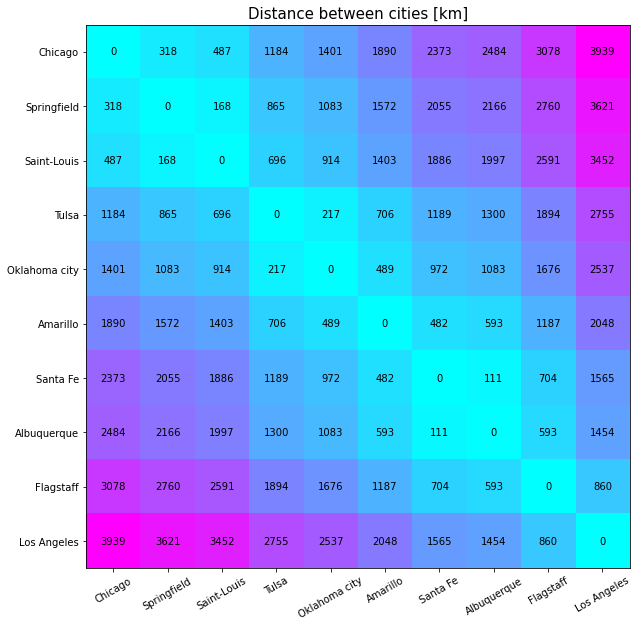

In [7]:

cities = np.array(['Chicago', 'Springfield','Saint-Louis','Tulsa','Oklahoma city', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
miles = np.array([ 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

distances = np.zeros((10,10))

for i in np.arange(0,10):
    for j in np.arange(0,10):
        distances[i][j] = (np.abs(miles[i] - miles [j])) 

distances_km = distances * 1.60934

print('Distances matrix in miles:\n',distances)
print('\nDistances matrix in miles:\n',distances_km)

# plot the results
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(distances_km, cmap = 'cool')

ax.set_xticks(np.arange(len(cities)))
ax.set_yticks(np.arange(len(cities)))
ax.set_xticklabels(cities, rotation = 30)
ax.set_yticklabels(cities)

for i in range(len(cities)):
    for j in range(len(cities)):
        text = ax.text(j, i, int(distances_km[i, j]), va='center', ha='center')

ax.set_title('Distance between cities [km]', fontsize = 15)


plt.show()



7\. Prime numbers sieve: compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [13]:
import time 

def is_prime(N):
    mask = np.ones(N, bool)
    mask[0], mask[1] = 0, 0
    for i in np.arange(2, N):
        if mask[i]:
            j = 2
            while i*j < N:
                mask[i*j] = 0
                j += 1
    numbers = np.array([i for i in np.arange(N)])
    primes = numbers[mask]
    return primes


print('The prime numbers between 0 and 99 are: \n',is_prime(100))
print('Execution time:\n')
%timeit is_prime(100)

The prime numbers between 0 and 99 are: 
 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
Execution time:

105 µs ± 6.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
N = np.array([100*i for i in range(1,10)])

for i in range(0,len(N)):
    print('Execution time for N = {} is:'.format(N[i]))
    %timeit is_prime(N[i])
    

Execution time for N = 100 is:
92.4 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 200 is:
185 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 300 is:
294 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Execution time for N = 400 is:
398 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Execution time for N = 500 is:
507 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Execution time for N = 600 is:
584 µs ± 5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Execution time for N = 700 is:
695 µs ± 6.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Execution time for N = 800 is:
806 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Execution time for N = 900 is:
921 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
def primes_sieve(limit):
    limitn = limit + 1
    not_prime = set()
    primes = []

    for i in range(2, limitn):
        if i in not_prime:
            continue

        for f in range(i*2, limitn, i):
            not_prime.add(f)

        primes.append(i)

    return primes

for i in range(0,len(N)):
    print('Execution time for N = {} is:'.format(N[i]))
    %timeit primes_sieve(N[i])
    

Execution time for N = 100 is:
15 µs ± 736 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Execution time for N = 200 is:
29 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 300 is:
51 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 400 is:
74.5 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 500 is:
95.6 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 600 is:
116 µs ± 3.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 700 is:
139 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 800 is:
161 µs ± 3.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Execution time for N = 900 is:
184 µs ± 3.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


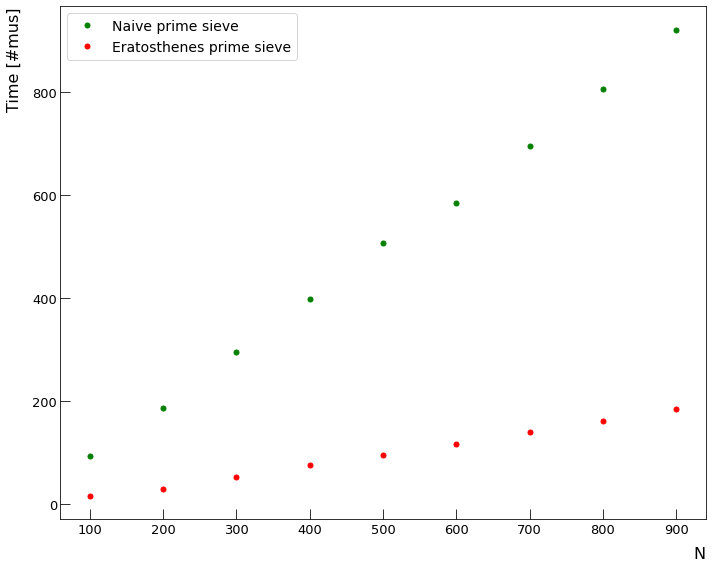

In [26]:
x = N
# execution time with naive method in microseconds
y_1 = np.array([92.4, 185, 294, 398, 507,584,695,806,921])
# execution time with other method in microseconds
y_2 = np.array([15, 29, 51, 74.5, 95.6, 116, 139, 161, 184])

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x,y_1,'o', color="green", label='Naive prime sieve', markersize = 5)
ax.plot(x,y_2,'o', color="red", label='Eratosthenes prime sieve', markersize = 5)

ax.set_xlabel('N', fontsize = 16, loc = 'right', labelpad = 10)
ax.set_ylabel('Time [#mus]', fontsize = 16, loc = 'top', labelpad = 10)

ax.legend(loc = 'best', prop = {'size': 14}, ncol = 1)
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10,labelsize = 13)

fig.tight_layout()
plt.show()
